In [1]:
#### import scanpy as sc
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
import numpy as np
import glob as glob

# DropSeq

In [3]:
sorted(glob.glob('demultiplexed_dropseq_sub_whitelist/*.Solo.out/Gene/Summary.csv'))

['demultiplexed_dropseq_sub_whitelist/SRR1853178.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853179.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853180.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853181.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853182.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853183.Solo.out/Gene/Summary.csv',
 'demultiplexed_dropseq_sub_whitelist/SRR1853184.Solo.out/Gene/Summary.csv']

In [4]:
metadata = []
for filename in sorted(glob.glob('demultiplexed_dropseq_sub_whitelist/*.Solo.out/Gene/Summary.csv')):
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('demultiplexed_dropseq_sub_whitelist/SRR18531', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T

In [5]:
metadata

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
78,348070800.0,0.438338,0.802721,0.763639,0.620943,0.545695,0.545695,0.189384,0.184095,2835.0,43441146.0,0.677940,15323.0,11890.0,7760215.0,2737.0,2030.0,1547.0,1298.0,22008.0
79,474642000.0,0.472913,0.835262,0.771174,0.620949,0.543406,0.543406,0.211438,0.205259,2383.0,58081056.0,0.596165,24373.0,18995.0,8249998.0,3462.0,2639.0,1846.0,1603.0,22285.0
80,322756560.0,0.503067,0.880514,0.787011,0.566501,0.542113,0.542113,0.219080,0.212778,1753.0,44625739.0,0.649805,25456.0,19192.0,4509862.0,2572.0,1885.0,1469.0,1228.0,21628.0
81,403445700.0,0.578215,0.735563,0.743126,0.608497,0.332305,0.332305,0.147068,0.143087,1904.0,35197856.0,0.609721,18486.0,13767.0,8463671.0,4445.0,3277.0,2136.0,1835.0,22185.0
82,403445700.0,0.529607,0.818202,0.828078,0.637601,0.535420,0.535420,0.239946,0.233264,2335.0,60681195.0,0.644794,25987.0,20242.0,10165214.0,4353.0,3258.0,2116.0,1810.0,22640.0
83,436670640.0,0.608171,0.898480,0.838650,0.591365,0.551566,0.551566,0.303512,0.295338,2377.0,84715715.0,0.656886,35639.0,27523.0,7397081.0,3111.0,2310.0,1720.0,1456.0,22139.0
84,210952000.0,0.335440,0.682060,0.788351,0.600760,0.562336,0.562336,0.161819,0.156963,1962.0,22170916.0,0.669581,11300.0,8203.0,6629449.0,3378.0,2419.0,1751.0,1468.0,20655.0


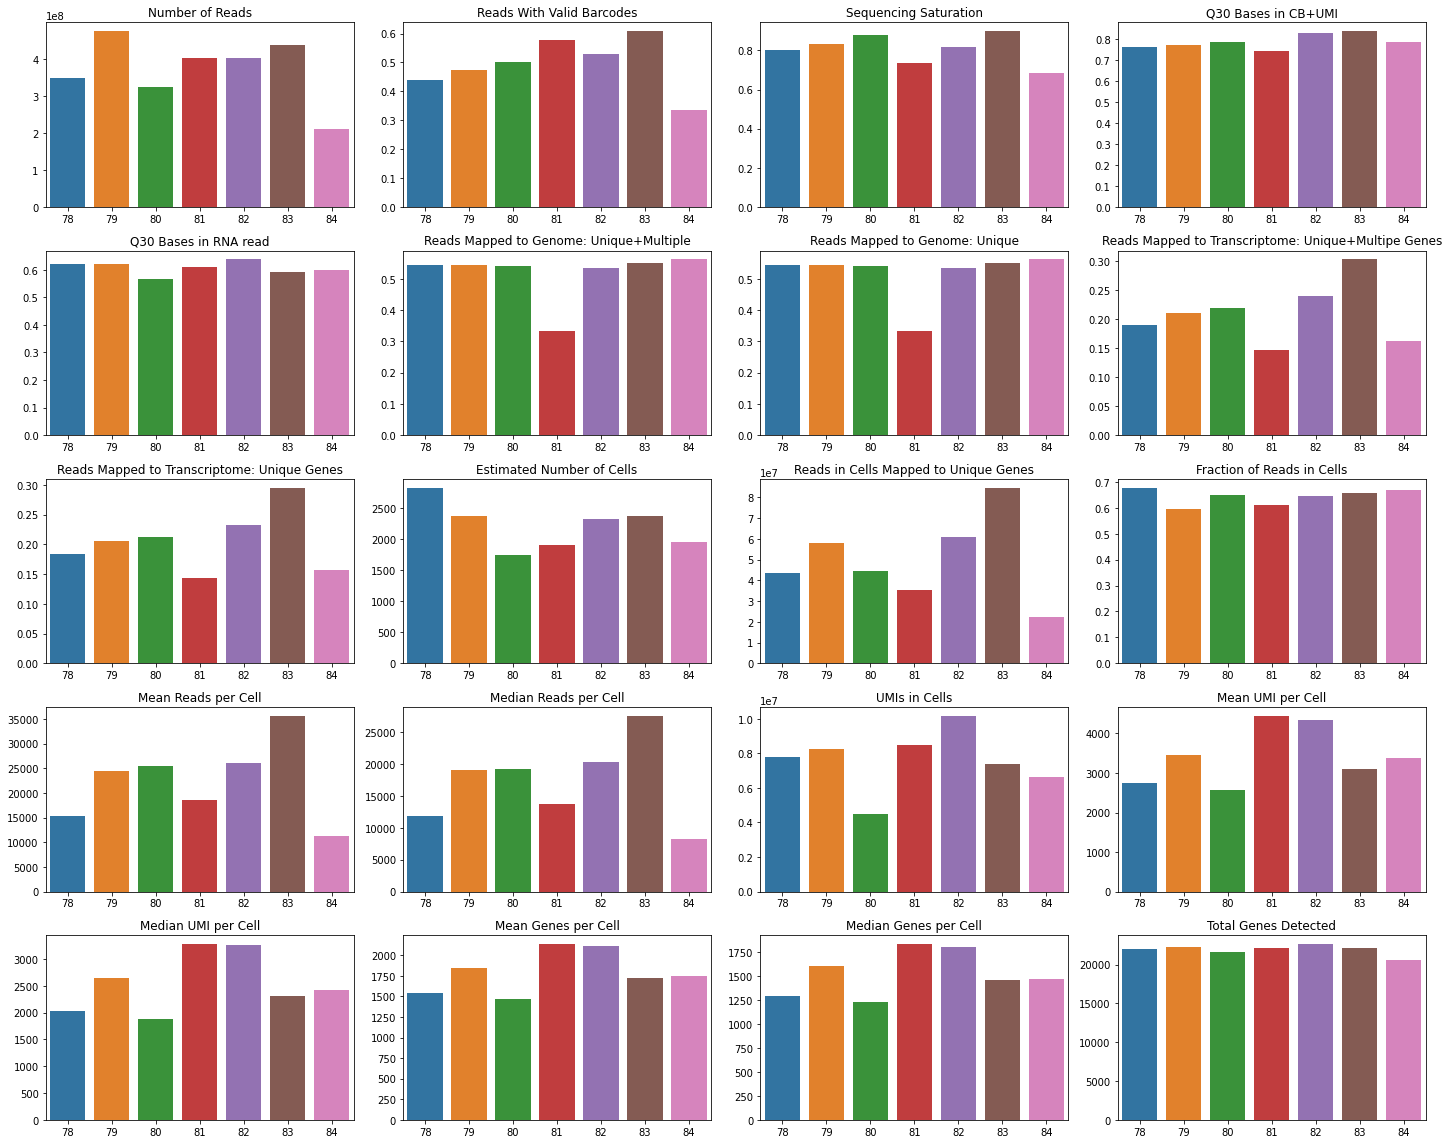

In [6]:
fig, axes =plt.subplots(5,4, figsize=(20,16))
axes = axes.flatten()
for statistic in range(0,metadata.shape[1]):
    sns.barplot(y = metadata[metadata.columns[statistic]], 
                x = metadata.index,
                ax = axes[statistic]
               ).set_title(metadata.columns[statistic])
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])

plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/dropseq_starsoloqc_sub_whitelist.png', dpi=150)
plt.show()
plt.close()

In [7]:
barcode_rank = []

for filename in sorted(glob.glob('demultiplexed_dropseq_sub_whitelist/*.Solo.out/Gene/UMIperCellSorted.txt')):
    x = pd.read_csv(filename, header=None)
    sample=filename.replace('demultiplexed_indrop/SRR18531', '')
    sample=sample.replace('.Solo.out/Gene/UMIperCellSorted.txt', '')
    x.columns = [sample]
    barcode_rank.append(x)

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [8]:
barcode_rank_df

,demultiplexed_dropseq_sub_whitelist/SRR1853178,demultiplexed_dropseq_sub_whitelist/SRR1853179,demultiplexed_dropseq_sub_whitelist/SRR1853180,demultiplexed_dropseq_sub_whitelist/SRR1853181,demultiplexed_dropseq_sub_whitelist/SRR1853182,demultiplexed_dropseq_sub_whitelist/SRR1853183,demultiplexed_dropseq_sub_whitelist/SRR1853184
0,38745.0,61031,30761.0,49158.0,38458.0,41504.0,46759.0
1,34495.0,41817,29641.0,47284.0,34639.0,36423.0,39044.0
2,28509.0,35103,24843.0,42055.0,32100.0,31767.0,34743.0
3,22808.0,26019,19524.0,38735.0,30752.0,29799.0,30775.0
4,22617.0,24624,19461.0,30487.0,30032.0,26986.0,29813.0
...,...,...,...,...,...,...,...
37637,NaN,1,NaN,NaN,NaN,NaN,NaN
37638,NaN,1,NaN,NaN,NaN,NaN,NaN
37639,NaN,1,NaN,NaN,NaN,NaN,NaN
37640,NaN,1,NaN,NaN,NaN,NaN,NaN


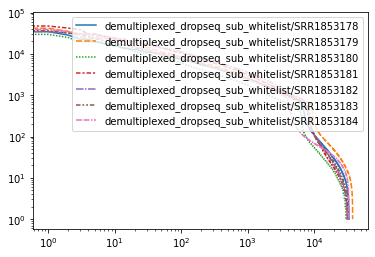

In [9]:
ax = sns.lineplot(data=barcode_rank_df)
ax.set_xscale('log')
ax.set_yscale('log')

Please note that this kneeplot is artificially good!!! All non-cells on the right of the knee are barcodes with 1 mismatch to the artificial whitelist (barcodes to left of knee). thousands of barcodes have already been removed during the barcode filtering stage.

In [10]:
ncells_dict = {
    '78': 6600,
    '79': 9000,
    '80': 6120,
    '81': 7650,
    '82': 7650,
    '83': 8280,
    '84': 4000,
}


In [11]:
barcode_rank_df.columns

Index(['demultiplexed_dropseq_sub_whitelist/SRR1853178',
       'demultiplexed_dropseq_sub_whitelist/SRR1853179',
       'demultiplexed_dropseq_sub_whitelist/SRR1853180',
       'demultiplexed_dropseq_sub_whitelist/SRR1853181',
       'demultiplexed_dropseq_sub_whitelist/SRR1853182',
       'demultiplexed_dropseq_sub_whitelist/SRR1853183',
       'demultiplexed_dropseq_sub_whitelist/SRR1853184'],
      dtype='object')

In [12]:
barcode_rank_df.columns = [barcode_rank_df.columns[x].replace('demultiplexed_dropseq_sub_whitelist/SRR18531', '') for x in range(len(barcode_rank_df.columns))]

In [13]:
for sample in barcode_rank_df.columns:
    incells = barcode_rank_df[sample][0:ncells_dict[sample]-1].sum()
    outcells = barcode_rank_df[sample][ncells_dict[sample]:].sum()
    total = barcode_rank_df[sample].sum()
    print(incells/total)

0.8832790072828945
0.8997888660124749
0.906590567535988
0.9331619562535133
0.9315229468690802
0.9269745604121185
0.8475774261027429


# inDrop reads per cell

In [12]:
sorted(glob.glob('demultiplexed_indrop_index/*.Solo.out/Gene/Summary.csv'))

['demultiplexed_indrop_index/SRR10545068.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545069.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545070.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545071.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545072.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545073.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545074.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545075.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545076.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545077.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545078.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/SRR10545079.Solo.out/Gene/Summary.csv',
 'demultiplexed_indrop_index/merged.Solo.out/Gene/Summary.csv']

In [22]:
metadata = []
for filename in sorted(glob.glob('demultiplexed_indrop_index/*.Solo.out/Gene/Summary.csv')):
    x = pd.read_csv(filename, header=None, index_col = 0)
    sample=filename.replace('demultiplexed_indrop/SRR105450', '')
    sample=sample.replace('.Solo.out/Gene/Summary.csv', '')
    x.columns = [sample]
    metadata.append(x)

metadata = pd.concat(metadata, axis = 1)
metadata = metadata.T

In [23]:
metadata

,Number of Reads,Reads With Valid Barcodes,Sequencing Saturation,Q30 Bases in CB+UMI,Q30 Bases in RNA read,Reads Mapped to Genome: Unique+Multiple,Reads Mapped to Genome: Unique,Reads Mapped to Transcriptome: Unique+Multipe Genes,Reads Mapped to Transcriptome: Unique Genes,Estimated Number of Cells,Reads in Cells Mapped to Unique Genes,Fraction of Reads in Cells,Mean Reads per Cell,Median Reads per Cell,UMIs in Cells,Mean UMI per Cell,Median UMI per Cell,Mean Genes per Cell,Median Genes per Cell,Total Genes Detected
demultiplexed_indrop_index/SRR10545068,1.362522e+08,0.421600,0.261272,0.834279,0.800453,0.488978,0.488978,0.290449,0.282861,13956.0,20664237.0,0.536171,1480.0,1256.0,14962203.0,1072.0,919.0,795.0,717.0,20789.0
demultiplexed_indrop_index/SRR10545069,1.030366e+08,0.352682,0.189946,0.734679,0.711272,0.450167,0.450167,0.233702,0.227481,12261.0,11801511.0,0.503501,962.0,801.0,9389434.0,765.0,644.0,598.0,529.0,19968.0
demultiplexed_indrop_index/SRR10545070,9.885942e+07,0.379293,0.190964,0.744584,0.710311,0.447653,0.447653,0.249041,0.242448,12213.0,12039080.0,0.502292,985.0,822.0,9569915.0,783.0,661.0,611.0,540.0,20043.0
demultiplexed_indrop_index/SRR10545071,1.006607e+08,0.363700,0.189410,0.737797,0.712597,0.452498,0.452498,0.241028,0.234622,12289.0,11903417.0,0.504016,968.0,806.0,9482639.0,771.0,650.0,603.0,533.0,20006.0
demultiplexed_indrop_index/SRR10545072,1.347892e+08,0.399197,0.251432,0.821007,0.798391,0.483215,0.483215,0.275268,0.268060,13859.0,19302616.0,0.534232,1392.0,1181.0,14163734.0,1021.0,875.0,764.0,689.0,20654.0
demultiplexed_indrop_index/SRR10545073,1.302101e+08,0.420346,0.252223,0.826554,0.791933,0.486340,0.486340,0.288692,0.281131,14029.0,19666338.0,0.537241,1401.0,1191.0,14424143.0,1028.0,884.0,768.0,694.0,20694.0
demultiplexed_indrop_index/SRR10545074,1.314736e+08,0.404533,0.248747,0.821661,0.796305,0.485901,0.485901,0.278873,0.271555,13880.0,19093006.0,0.534784,1375.0,1169.0,14063877.0,1013.0,869.0,759.0,685.0,20582.0
demultiplexed_indrop_index/SRR10545075,1.258430e+08,0.410132,0.251882,0.806074,0.767215,0.496859,0.496859,0.284408,0.277047,12864.0,18227794.0,0.522819,1416.0,1186.0,13304051.0,1034.0,882.0,770.0,690.0,20644.0
demultiplexed_indrop_index/SRR10545076,1.255973e+08,0.396990,0.247645,0.800275,0.773506,0.492923,0.492923,0.275899,0.268711,12663.0,17525358.0,0.519280,1383.0,1165.0,12859939.0,1015.0,868.0,759.0,681.0,20572.0
demultiplexed_indrop_index/SRR10545077,1.201732e+08,0.416573,0.246383,0.800100,0.757655,0.492646,0.492646,0.287707,0.280250,12586.0,17420675.0,0.517264,1384.0,1163.0,12813055.0,1018.0,868.0,761.0,683.0,20563.0


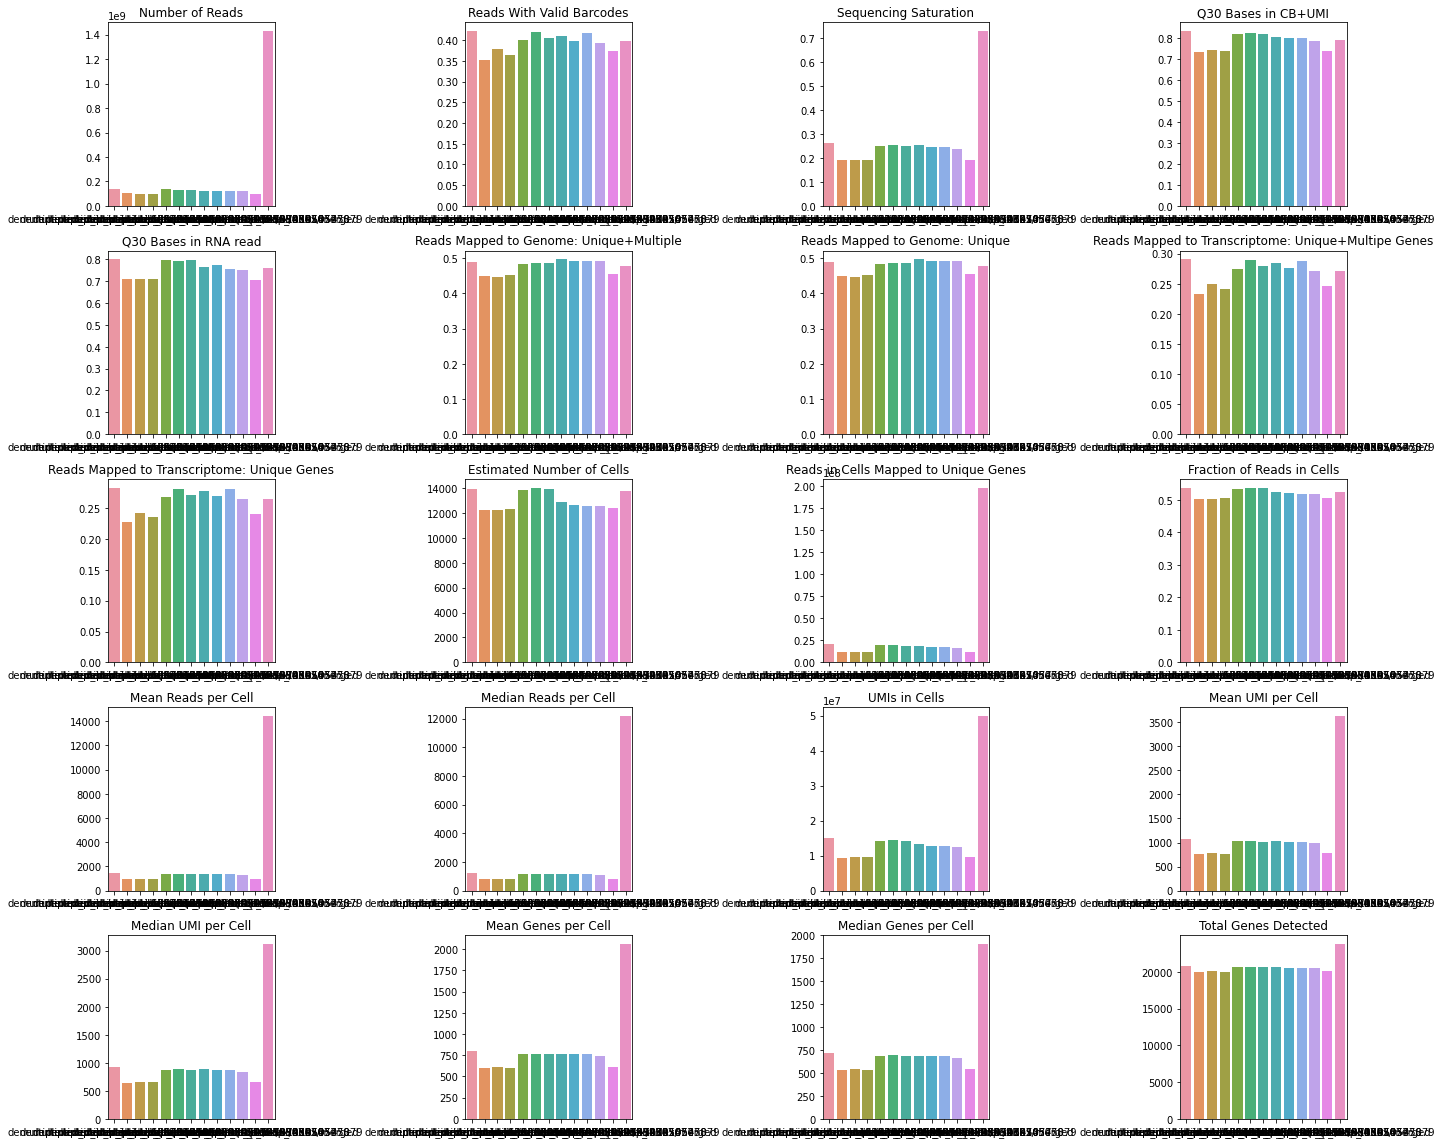

In [24]:
fig, axes =plt.subplots(5,4, figsize=(20,16))
axes = axes.flatten()
for statistic in range(0,metadata.shape[1]):
    sns.barplot(y = metadata[metadata.columns[statistic]], 
                x = metadata.index,
                ax = axes[statistic]
               ).set_title(metadata.columns[statistic])
    axes[statistic].set_ylabel('')
    # axes[statistic].get_xaxis().set_ticklabels([])

plt.tight_layout()
plt.gcf()
plt.savefig('plts_python/indrop_starsoloqc.png', dpi=150)
plt.show()
plt.close()

In [25]:
metadata['reads_per_cell'] = metadata['Number of Reads']/metadata['Estimated Number of Cells']

In [26]:
metadata['reads_per_cell']

demultiplexed_indrop_index/SRR10545068      9762.981728
demultiplexed_indrop_index/SRR10545069      8403.608189
demultiplexed_indrop_index/SRR10545070      8094.605420
demultiplexed_indrop_index/SRR10545071      8191.120189
demultiplexed_indrop_index/SRR10545072      9725.749621
demultiplexed_indrop_index/SRR10545073      9281.496828
demultiplexed_indrop_index/SRR10545074      9472.159006
demultiplexed_indrop_index/SRR10545075      9782.571906
demultiplexed_indrop_index/SRR10545076      9918.447050
demultiplexed_indrop_index/SRR10545077      9548.167329
demultiplexed_indrop_index/SRR10545078      9640.742864
demultiplexed_indrop_index/SRR10545079      8114.000644
demultiplexed_indrop_index/merged         103957.690651
Name: reads_per_cell, dtype: float64

In [39]:
barcode_rank = []

for filename in sorted(glob.glob('demultiplexed_indrop_index/merged.Solo.out/Gene/UMIperCellSorted.txt')):
    x = pd.read_csv(filename, header=None)
    sample=filename.replace('demultiplexed_indrop/SRR105450', '')
    sample=sample.replace('.Solo.out/Gene/UMIperCellSorted.txt', '')
    x.columns = [sample]
    barcode_rank.append(x)

barcode_rank_df = pd.concat(barcode_rank, axis = 1)

In [40]:
barcode_rank_df

,demultiplexed_indrop_index/merged
0,41203
1,38021
2,27611
3,25914
4,24172
...,...
1313980,1
1313981,1
1313982,1
1313983,1


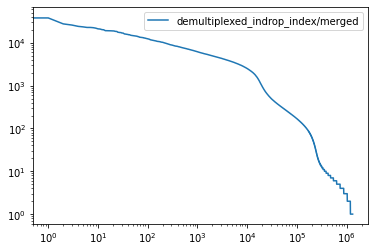

In [41]:
ax = sns.lineplot(data=barcode_rank_df)
ax.set_xscale('log')
ax.set_yscale('log')

In [42]:
barcode_rank_df[0:27093].sum()

demultiplexed_indrop_index/merged    63751280
dtype: int64

In [43]:
barcode_rank_df[27094:].sum()

demultiplexed_indrop_index/merged    38967051
dtype: int64

In [44]:
barcode_rank_df[0:27093].sum()/(barcode_rank_df[0:27093].sum()+barcode_rank_df[27094:].sum())

demultiplexed_indrop_index/merged    0.620642
dtype: float64